In [3]:
import os 
import pickle 
import seaborn as sns
import matplotlib.pyplot as plt

base_dir = "../outputs/sae"


dfs = {
    'SAE': [],
    'Lang': [],
    'Quantile': [],
    'Step': [],
    'Loss': [],
    'Sparsity': [],
}
rename ={
    'gated': 'Gated',
    'standard': 'Standard',
    'q2': '50%',
    'q3': '75%',
}
for root, dirs, files in os.walk(base_dir):
    if 'infos.pkl' in files:
        with open(f"{root}/infos.pkl", "rb") as f:
            infos = pickle.load(f)
        sae = root.split('/')[-2]
        name = root.split('/')[-1]
        lang = name.split('_')[-2]
        quantile = name.split('_')[-1]
        for k, v in infos.items():
            dfs['SAE'].append(rename[sae])
            dfs['Lang'].append(lang)
            dfs['Quantile'].append(rename[quantile])
            dfs['Step'].append(k)
            dfs['Loss'].append(v['loss'])
            dfs['Sparsity'].append(v['sparsity_loss'])

import pandas as pd
dfs = pd.DataFrame(dfs)
N = 2000
dfs['Step'] = (dfs['Step'] // N) * N
dfs


,SAE,Lang,Quantile,Step,Loss,Sparsity
0,Gated,en,50%,0,1664.076294,367.298187
1,Gated,en,50%,0,950.746399,404.272064
2,Gated,en,50%,0,9479.852539,1321.559570
3,Gated,en,50%,0,340.480835,245.348251
4,Gated,en,50%,0,486.662781,317.877533
...,...,...,...,...,...,...
7203,Standard,en,75%,88000,7.495271,17.058416
7204,Standard,en,75%,88000,8.098110,49.466019
7205,Standard,en,75%,88000,7.171036,23.173489
7206,Standard,en,75%,88000,7.820189,23.368145


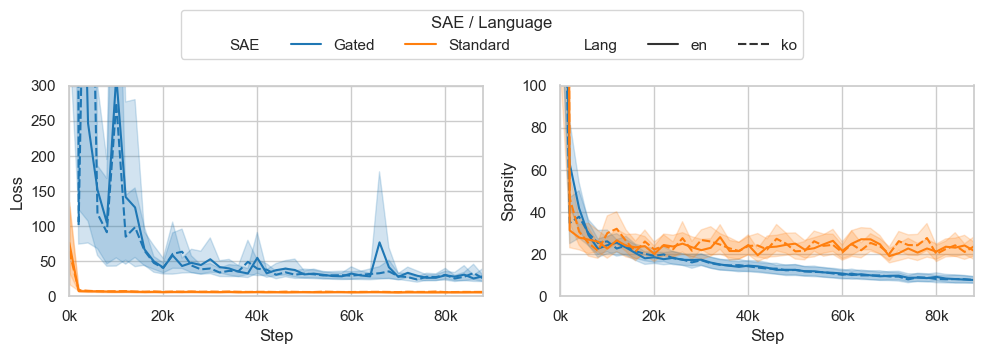

In [4]:
sns.set_theme(style="whitegrid")
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
sns.lineplot(data=dfs, x='Step', y='Loss', hue='SAE', style='Lang', ax=axes[0], palette=colors[:2])
sns.lineplot(data=dfs, x='Step', y='Sparsity', hue='SAE', style='Lang', ax=axes[1], palette=colors[:2])

axes[0].set_ylim(0, 300)
axes[1].set_ylim(0, 100)
axes[0].set_xlim(0, dfs['Step'].max()-2000)
axes[1].set_xlim(0, dfs['Step'].max()-2000)
axes[0].get_legend().remove()
axes[1].get_legend().remove()
# Set x-ticks every 20000 steps
xticks = range(0, int(dfs['Step'].max()), 20000)
axes[0].set_xticks(xticks)
axes[1].set_xticks(xticks)

# Format x-tick labels to show 'k' for thousands
axes[0].set_xticklabels([f'{x//1000}k' for x in xticks])
axes[1].set_xticklabels([f'{x//1000}k' for x in xticks])


handles1, labels1 = axes[0].get_legend_handles_labels()
fig.legend(handles1, labels1, loc='upper center', bbox_to_anchor=(0.5, 1.2), 
          ncol=6, title='SAE / Language')

plt.tight_layout()
os.makedirs('assets', exist_ok=True)
plt.savefig('../assets/loss_sparsity_lang.png', bbox_inches='tight')


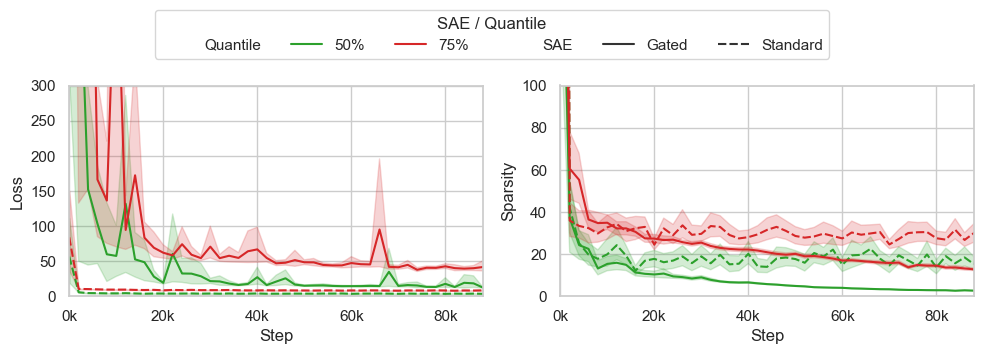

In [5]:
sns.set_theme(style="whitegrid")
colors = ['#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
sns.lineplot(data=dfs, x='Step', y='Loss', hue='Quantile', style='SAE', ax=axes[0], palette=colors[:2])
sns.lineplot(data=dfs, x='Step', y='Sparsity', hue='Quantile', style='SAE', ax=axes[1], palette=colors[:2])

axes[0].set_ylim(0, 300)
axes[1].set_ylim(0, 100)
axes[0].set_xlim(0, dfs['Step'].max()-2000)
axes[1].set_xlim(0, dfs['Step'].max()-2000)
axes[0].get_legend().remove()
axes[1].get_legend().remove()
# Set x-ticks every 20000 steps
xticks = range(0, int(dfs['Step'].max()), 20000)
axes[0].set_xticks(xticks)
axes[1].set_xticks(xticks)

# Format x-tick labels to show 'k' for thousands
axes[0].set_xticklabels([f'{x//1000}k' for x in xticks])
axes[1].set_xticklabels([f'{x//1000}k' for x in xticks])


handles1, labels1 = axes[0].get_legend_handles_labels()
fig.legend(handles1, labels1, loc='upper center', bbox_to_anchor=(0.5, 1.2), 
          ncol=6, title='SAE / Quantile')

plt.tight_layout()
os.makedirs('../assets', exist_ok=True)
plt.savefig('../assets/loss_sparsity_quantile.png', bbox_inches='tight')
